/tmp/ipykernel_4740/2167391720.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff.append(np.linalg.lstsq(p_matrix,pop)[0])


[289.05647812 279.4533739  284.8804017  297.14100467 320.99271593
   0.        ]
[5.18747560e-002 2.41368451e-002 5.11813069e-002 5.25297325e-002
 5.12775734e-002 6.91317418e-310]


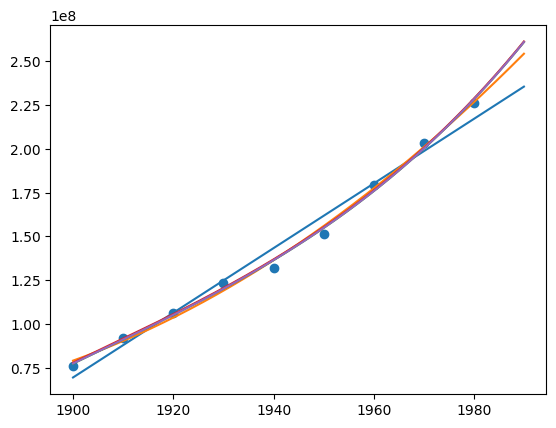

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import mpmath as mp

def polynomial_matrix(x_values,pow):
    m = len(x_values)
    n = pow + 1
    matrix = np.empty(shape=(m,n))
    for i in range(m):
        for j in range(n):
            matrix[i][j] = x_values[i]**j
    return np.matrix(matrix)

def horner(x,c):
    result = 0 
    for i in range(len(c)-1,-1,-1):
        result = (result*x) + c[i]
    return result

def sqdiff(real,calculated):
    sum = 0
    for yr,yc in zip(real,calculated):
        sum += (yr-yc)**2
    return sum

if __name__ == "__main__":
    # Something is wrong with np.linalg.lstsq when m>6
    m = 6
    real = 248709873
    years = np.array([1900,1910,1920,1930,1940,1950,1960,1970,1980])
    pop = [76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226542199]
    n = len(years)
    coeff = []
    x_space = np.arange(1900, 1990, 0.1)
    AICcs = np.empty(shape=m)
    errors = np.empty(shape=m)
    for i in range(1,m):
        k = i+1
        p_matrix = polynomial_matrix(years,i)
        coeff.append(np.linalg.lstsq(p_matrix,pop)[0])
        y_vals = [horner(x,coeff[i-1]) for x in years]
        y_space = [horner(x,coeff[i-1]) for x in x_space]
        AICcs[i-1] = 2*k+n*np.log(sqdiff(pop,y_vals)/n)+2*k*(k+1)/(n-k-1)
        errors[i-1] = abs(real-horner(1990,coeff[i-1]))/real
        plt.plot(x_space,y_space)
    plt.scatter(years,pop)
    print(AICcs)
    print(errors)
    
   